In [1]:
!pip install pandas

In [9]:
import pandas as pd
file_path='Combined_set_prescreened.csv';
total_info=pd.read_csv(file_path)
print(total_info)

                                               MOF  uptake_ads  uptake_des  \
0                                   XUKYEI_neutral    0.920997    0.668303   
1                           ja300034j_si_002_clean    0.433112    0.187346   
2                                   QIYDAF01_clean    0.827077    0.660425   
3                                     XAHPIH_clean    0.818678    0.634451   
4                                     VETMIS_clean    0.932519    0.746597   
...                                            ...         ...         ...   
7180                                  AQOTIK_clean    0.026746    0.110716   
7181  acs.inorgchem.6b00276_ic6b00276_si_006_clean    0.421515    0.395023   
7182  acs.inorgchem.6b01762_ic6b01762_si_002_clean    0.087637    0.074696   
7183  acs.inorgchem.6b02696_ic6b02696_si_002_clean    0.294982    0.280449   
7184              acscombsci.5b00188_5036495_clean    0.549701    0.613880   

      heat_ads  heat_des      LISD      LFSD     LISFS  Unit_ce

In [10]:
# Drop rows with any NaN values
total_info_cleaned = total_info.dropna()

total_info_cleaned

,MOF,uptake_ads,uptake_des,heat_ads,heat_des,LISD,LFSD,LISFS,Unit_cell_volume,Density,...,O,La,Cr,Ti,Ba,Rh,Ce,Cu,Al,Re
0,XUKYEI_neutral,0.920997,0.668303,-21.55231,-18.39099,13.18217,10.20370,13.18217,6140.000,0.287208,...,0,0,0,0,0,0,0,2,0,0
1,ja300034j_si_002_clean,0.433112,0.187346,-25.96441,-17.79542,17.49700,17.44104,17.49700,2800.680,0.713223,...,18,0,0,0,0,0,0,0,0,0
2,QIYDAF01_clean,0.827077,0.660425,-19.37443,-18.95302,22.00141,13.48659,22.00141,52812.600,0.303251,...,96,0,0,0,0,0,0,24,0,0
3,XAHPIH_clean,0.818678,0.634451,-21.96228,-19.54395,14.37026,13.22660,14.37026,12821.800,0.356183,...,40,0,0,0,0,0,0,8,0,0
4,VETMIS_clean,0.932519,0.746597,-22.10557,-19.92746,18.13430,11.96931,18.13430,33152.200,0.311959,...,48,0,0,0,0,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,AQIXUU_clean,0.001177,0.062873,-25.56586,-49.26611,5.00071,3.78897,5.00071,787.077,2.316180,...,18,0,0,0,0,0,0,0,0,0
7177,AFOVOH_clean,0.165457,0.232918,-28.96937,-40.77527,8.74251,6.51591,8.19585,1598.690,1.048160,...,12,0,0,0,0,0,0,0,0,0
7178,ATIJUJ_manual,0.038061,0.186922,-10.98116,-19.63789,17.44029,16.95446,17.44029,3081.950,0.753394,...,18,0,0,0,0,0,0,0,0,0
7179,AFOVEX_clean,0.172913,0.244083,-29.31178,-38.54721,8.76979,6.57643,8.76042,1626.110,1.022060,...,12,0,0,0,0,0,2,0,0,0


In [11]:
uptake_ads = total_info_cleaned['uptake_ads']
uptake_des = total_info_cleaned['uptake_des']
heat_ads = total_info_cleaned['heat_ads']
heat_des = total_info_cleaned['heat_des']

In [12]:
# Given constants
delta_H_vap_Tev = 16.25          # Example value in kJ/mol
M_w = 0.044097                   # Molar mass in kg/mol
C_sorbent_p = 1                  # Specific heat capacity in kJ/(kg*K)
T_des = 358.15                   # Desorption temperature in Kelvin
T1 = 313.13                      # Initial temperature in Kelvin

# Calculate Δq
delta_q = uptake_ads - uptake_des

# Drop rows with negative Δq
filtered_indices = delta_q >= 0
total_info_cleaned = total_info_cleaned[filtered_indices].copy()
delta_q = delta_q[filtered_indices]  # Filter delta_q to match the filtered DataFrame

# Calculate <ΔH_ads>
avg_delta_H_ads = (heat_ads + heat_des) / 2
avg_delta_H_ads = avg_delta_H_ads[filtered_indices]  # Match indices with filtered DataFrame

# Calculate COP_R for each row
total_info_cleaned.loc[:, 'COP_R'] = (delta_H_vap_Tev * delta_q) / ((M_w * C_sorbent_p * (T_des - T1)) - (delta_q * avg_delta_H_ads))

# Print the results
print(total_info_cleaned[['MOF', 'COP_R']])


                         MOF     COP_R
0             XUKYEI_neutral  0.583945
1     ja300034j_si_002_clean  0.542431
2             QIYDAF01_clean  0.522907
3               XAHPIH_clean  0.515395
4               VETMIS_clean  0.512710
...                      ...       ...
6912            SANHUN_clean  0.000327
6913            PEKVUY_clean  0.000246
6914            HEXNII_clean  0.000137
6915            IBIYUO_clean  0.000066
6916            LIDZUV_clean  0.000000

[6917 rows x 2 columns]


In [18]:
total_info_cleaned.drop(columns=["MOF","uptake_ads","heat_ads","uptake_des","heat_des","Pu"], inplace=True)
total_info_cleaned

,LISD,LFSD,LISFS,Unit_cell_volume,Density,ASA_A2,ASA_m2_per_cm3,ASA_m2_per_g,NASA_A2,NASA_m2_per_cm3,...,La,Cr,Ti,Ba,Rh,Ce,Cu,Al,Re,COP_R
0,13.18217,10.20370,13.18217,6140.000,0.287208,1122.8100,1828.680,6367.080,0.0000,0.000,...,0,0,0,0,0,0,2,0,0,0.583945
1,17.49700,17.44104,17.49700,2800.680,0.713223,390.5410,1394.450,1955.140,0.0000,0.000,...,0,0,0,0,0,0,0,0,0,0.542431
2,22.00141,13.48659,22.00141,52812.600,0.303251,8995.1500,1703.220,5616.540,0.0000,0.000,...,0,0,0,0,0,0,24,0,0,0.522907
3,14.37026,13.22660,14.37026,12821.800,0.356183,2130.4900,1661.620,4665.070,0.0000,0.000,...,0,0,0,0,0,0,8,0,0,0.515395
4,18.13430,11.96931,18.13430,33152.200,0.311959,5856.6500,1766.600,5662.900,0.0000,0.000,...,0,0,0,0,0,0,12,0,0,0.512710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,6.56302,4.77517,6.56302,3664.890,1.599000,394.0410,1075.180,672.406,0.0000,0.000,...,0,0,0,0,0,0,0,0,0,0.000327
6913,5.67220,3.42753,4.50995,1630.010,2.827110,75.6807,464.295,164.230,67.0363,411.263,...,0,0,0,2,0,0,0,0,0,0.000246
6914,4.90669,3.50214,4.90669,847.141,1.567280,37.4215,441.738,281.850,0.0000,0.000,...,0,0,0,0,0,0,0,0,0,0.000137
6915,5.16636,4.13343,5.13222,17478.700,2.019600,806.0660,461.169,228.346,0.0000,0.000,...,0,0,0,0,0,0,64,0,0,0.000066


In [27]:

target = total_info_cleaned['COP_R']  # Using 'COP_R' as the target variable
# Drop the specified columns to select the features
features = total_info_cleaned.drop(columns=["COP_R"])
print(features)

import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.85, random_state=42)


          LISD      LFSD     LISFS  Unit_cell_volume   Density     ASA_A2  \
0     13.18217  10.20370  13.18217          6140.000  0.287208  1122.8100   
1     17.49700  17.44104  17.49700          2800.680  0.713223   390.5410   
2     22.00141  13.48659  22.00141         52812.600  0.303251  8995.1500   
3     14.37026  13.22660  14.37026         12821.800  0.356183  2130.4900   
4     18.13430  11.96931  18.13430         33152.200  0.311959  5856.6500   
...        ...       ...       ...               ...       ...        ...   
6912   6.56302   4.77517   6.56302          3664.890  1.599000   394.0410   
6913   5.67220   3.42753   4.50995          1630.010  2.827110    75.6807   
6914   4.90669   3.50214   4.90669           847.141  1.567280    37.4215   
6915   5.16636   4.13343   5.13222         17478.700  2.019600   806.0660   
6916   4.48832   3.71412   4.48832          1478.360  1.547160    47.6128   

      ASA_m2_per_cm3  ASA_m2_per_g  NASA_A2  NASA_m2_per_cm3  ...   O  La  

In [28]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Train the Random Forest Regressor with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

               Feature  Importance
16        AV_cm3_per_g    0.588100
7         ASA_m2_per_g    0.133636
4              Density    0.066932
15  AV_Volume_fraction    0.026460
6       ASA_m2_per_cm3    0.022340
..                 ...         ...
34                  Te    0.000000
65                  Th    0.000000
59                  Ge    0.000000
44                  As    0.000000
55                  Sn    0.000000

[105 rows x 2 columns]


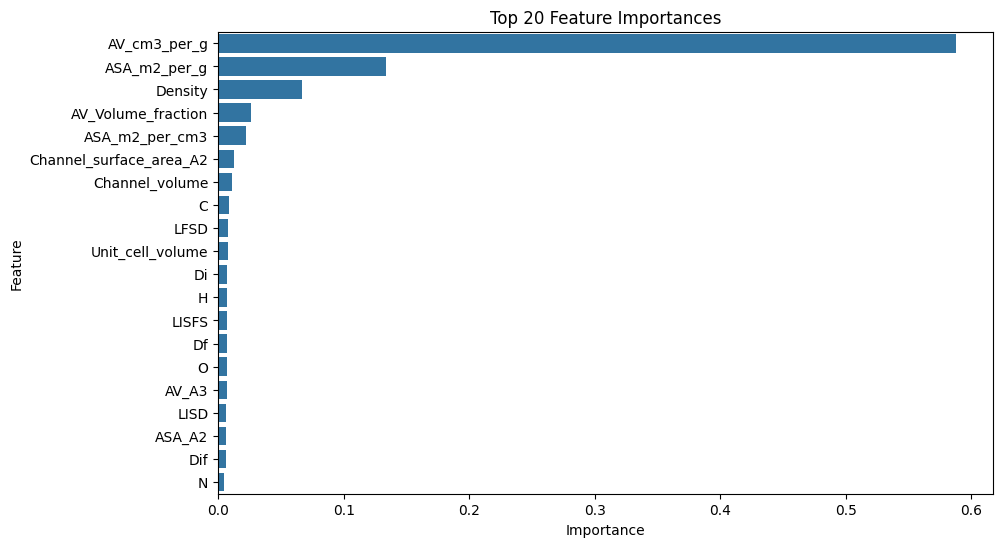

In [32]:
# Sort features by importance
# Calculate feature importance
importances = best_rf.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display the feature importances
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [51]:
# Filter features based on importance threshold
from sklearn.metrics import mean_squared_error
threshold = 0.0005  # You can adjust this threshold value
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(len(important_features))
# Select only the important features
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Train a new Random Forest Regressor with filtered features
rf_filtered = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
rf_filtered.fit(X_train_filtered, y_train)

# Predict on the test set
y_pred = rf_filtered.predict(X_test_filtered)

# Evaluate the model accuracy using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can also calculate other metrics such as R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

50
Mean Squared Error: 0.0014086089085809975
R2 Score: 0.7964854787876081
